## **Q1**

The code below shows a tsne clustering with two additional cuisines added to the sublist from the original four. The two cuisines I added are Mexican and Thai. Afterwards, I created another clustering plot to showcase all 25 unique cuisines from the dataset. In order to do so, I copied the code from the original source and changed the sublist.

(1931, 349) [0, 384, 590, 942, 1230, 1481, 1931]


<ipython-input-1-ee32b8dcf4dc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],


(6242, 349) [0, 204, 644, 854, 1044, 1555, 1907, 2357, 2645, 2821, 2959, 3210, 3395, 3779, 4105, 4122, 4309, 4515, 4703, 5073, 5365, 5467, 5643, 5835, 6149, 6242]


<ipython-input-1-ee32b8dcf4dc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],


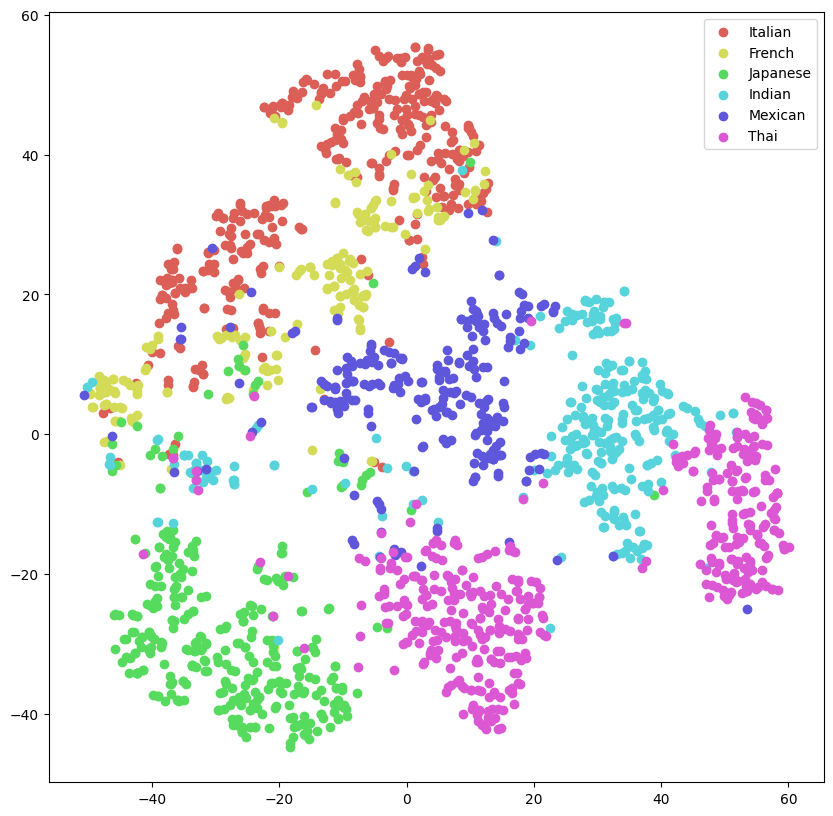

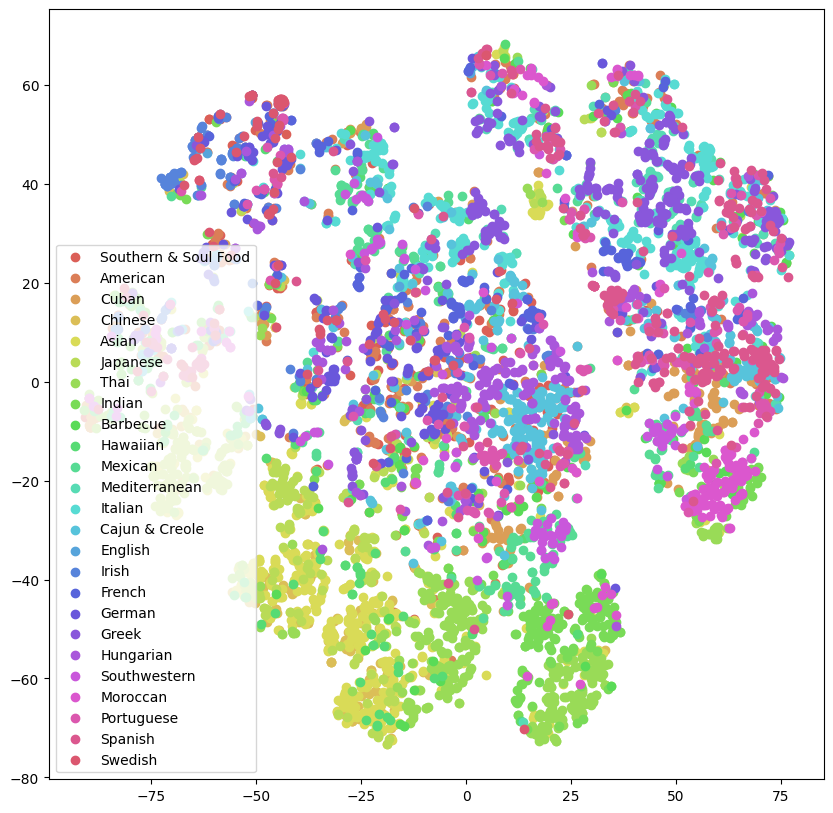

In [1]:
'''After recipes have been mapped to ingredient space and flavor space
Plot tsne clustering
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, TSNE

#take some regional cuisines, tsne clustering, and plotting
def tsne_cluster_cuisine(df,sublist):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print (df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE().fit_transform(dist)

    palette = sns.color_palette("hls", len(sublist))
    plt.figure(figsize=(10,10))
    for i,cuisine in enumerate(sublist):
        plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],
        tsne[lenlist[i]:lenlist[i+1],1],c=palette[i],label=sublist[i])
    plt.legend()
    return df_X

if __name__ == '__main__':
    yum_ingr = pd.read_pickle('/content/yummly_ingr.pkl')
    yum_ingrX = pd.read_pickle('/content/yummly_ingrX.pkl')

    #select 6 cuisines, and only changed the sublist
    sublist = ['Italian','French','Japanese','Indian','Mexican','Thai']
    df_ingr = yum_ingrX.copy()
    df_ingr['cuisine'] = yum_ingr['cuisine']
    df_ingr['recipeName'] = yum_ingr['recipeName']
    df_X = tsne_cluster_cuisine(df_ingr,sublist)

    df_ingr = yum_ingrX.copy()
    df_ingr['cuisine'] = yum_ingr['cuisine']
    df_ingr['recipeName'] = yum_ingr['recipeName']

    #The sublist now contains all 25 unique values
    sublist = df_ingr['cuisine'].unique().tolist()
    df_X = tsne_cluster_cuisine(df_ingr,sublist)

As you can tell, the clusters actually show some shape with 6 cuisines rather than all the cuisines. The second graph actually overfits the dataset with the clusters as half of it is jumbled.

## **Q2**

Next, we will do PCA analysis and measure how many components are required to explain 95% variability in the data. We will list down what percentage of variability is explained by each component as well. However, first, it is good practice to scale the data before doing PCA analysis.

In [2]:
#Q2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_Xscaled = scaler.fit_transform(df_X)

pca = PCA()
pca.fit(df_Xscaled)

# Find the number of components that explain 95% of the variability
total = 0
print("PCA WITH SCALING RESULTS:")
for i, var_ratio in enumerate(pca.explained_variance_ratio_, start=1):
    total = total + var_ratio
    print(f"Component {i}: {var_ratio:.4f}")
    if total > 0.95:
      print(total)
      break

#Do PCA without scaling

df_X = pca.fit(df_X)

total = 0
print("\nPCA WITH NO SCALING RESULTS")
for i, var_ratio in enumerate(pca.explained_variance_ratio_, start=1):
    total = total + var_ratio
    print(f"Component {i}: {var_ratio:.4f}")
    if total > 0.95:
      print(total)
      break

PCA WITH SCALING RESULTS:
Component 1: 0.0170
Component 2: 0.0146
Component 3: 0.0117
Component 4: 0.0102
Component 5: 0.0095
Component 6: 0.0084
Component 7: 0.0079
Component 8: 0.0077
Component 9: 0.0076
Component 10: 0.0071
Component 11: 0.0069
Component 12: 0.0067
Component 13: 0.0064
Component 14: 0.0063
Component 15: 0.0063
Component 16: 0.0063
Component 17: 0.0060
Component 18: 0.0059
Component 19: 0.0058
Component 20: 0.0056
Component 21: 0.0055
Component 22: 0.0055
Component 23: 0.0054
Component 24: 0.0052
Component 25: 0.0052
Component 26: 0.0051
Component 27: 0.0050
Component 28: 0.0050
Component 29: 0.0050
Component 30: 0.0049
Component 31: 0.0048
Component 32: 0.0048
Component 33: 0.0047
Component 34: 0.0047
Component 35: 0.0047
Component 36: 0.0046
Component 37: 0.0046
Component 38: 0.0045
Component 39: 0.0045
Component 40: 0.0044
Component 41: 0.0044
Component 42: 0.0044
Component 43: 0.0043
Component 44: 0.0043
Component 45: 0.0043
Component 46: 0.0042
Component 47: 0.0

As you can tell, 292 components are needed to explain 95% variability within the data if the data is scaled. Each component is listed to show how much they affect the variability. These are the most important components to achieve 95% variability. By having a 95% variability threshold, these are the components that are retained to reduce the dimensionality of the massive dataset.

However, if you do not scale the data, you only need 127 components to explain 95% variability within the data. This is due to all the values being boolean types.

# **Q3**

Next, we will utilize silhouette and elbow analysis by plotting the relevant graph to show the optimal choice of K (if there is one). We will utilize the KMeans algorithm to cluster the dataset from the range of 2 to 25.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

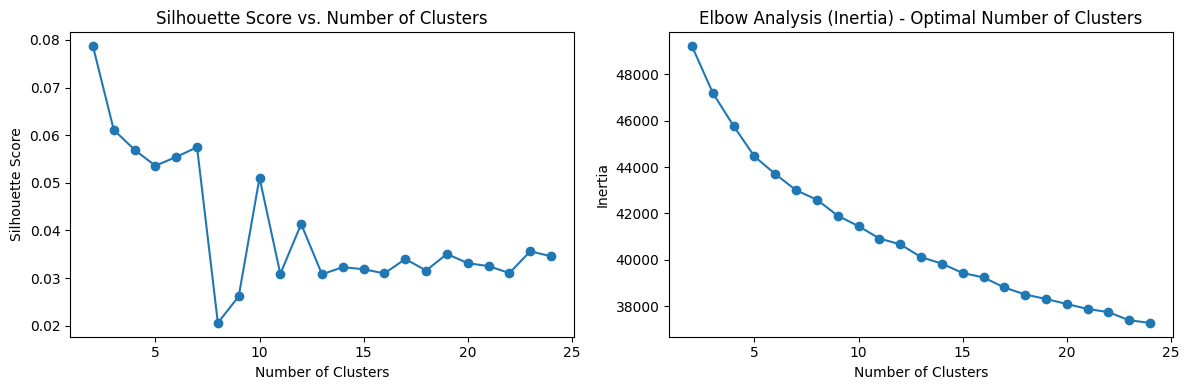

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

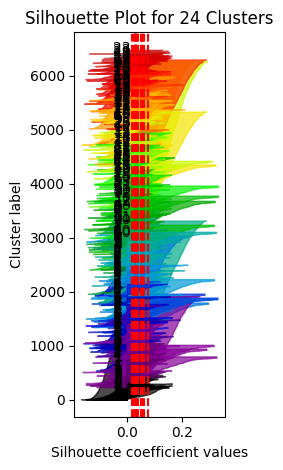

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

silScore = []
inertias = []

for clusterNum in range(2,25):
  kmeans = KMeans(n_clusters=clusterNum, random_state=42)
  cluster = kmeans.fit_predict(df_X)

  silAvg = silhouette_score(df_X, cluster)
  silScore.append(silAvg)

  inertias.append(kmeans.inertia_)

# Plot silhouette scores
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2,25), silScore, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot elbow curve (inertia)
plt.subplot(1, 2, 2)
plt.plot(range(2,25), inertias, marker='o')
plt.title('Elbow Analysis (Inertia) - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

plt.subplot(1, 3, 3)
for clusterNum in range(2, 25):
    kmeans = KMeans(n_clusters=clusterNum, random_state=42)
    cluster = kmeans.fit_predict(df_X)

    # Compute the silhouette score
    silAvg = silhouette_score(df_X, cluster)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_X, cluster)

    y_lower = 10
    for i in range(clusterNum):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / clusterNum)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    plt.title(f"Silhouette Plot for {clusterNum} Clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silAvg, color="red", linestyle="--")

plt.tight_layout()
plt.show()

In [4]:
import numpy as np

optimalSilK = range(2,25)[np.argmax(silScore)]

print("Optimal K for Silhouette Score", optimalSilK)

Optimal K for Silhouette Score 2


Based off the graph of the silhouette score, the best cluster size is 2, but the best cluster size for the elbow analysis seems to be around 9. It is very inconsistent on where the optimal "k" is. The dataset should be further explored. After doing some research, there are multiple methods to find the optimal "K" clusters such as calculating the Calinski-Harabasz Index and the Davies-Bouldin Index.

The actual silhouette analysis for 24 clusters is also shown and although there are some distinctions between the colors, it is too jumbled to be an optimal K value.

## **Q4**

Now, let's build clustering models which will be the following:

*   DBSCAN
*   Hierarchical Clustering
*   GMM





**DBSCAN**

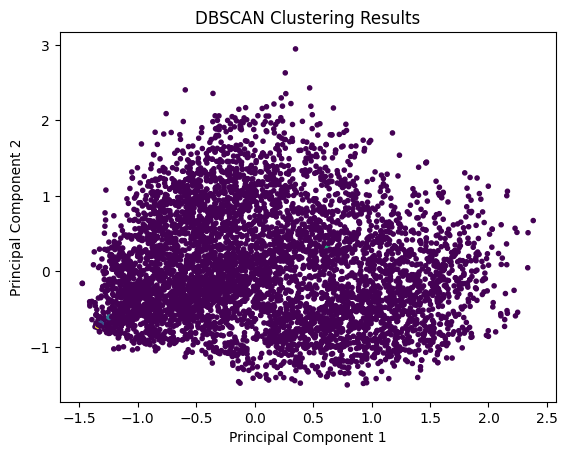

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(df_X)
dfPCA = pca.fit_transform(df_X)

plt.scatter(dfPCA[:, 0], dfPCA[:, 1], c=clusters, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Hierarchical Clustering**

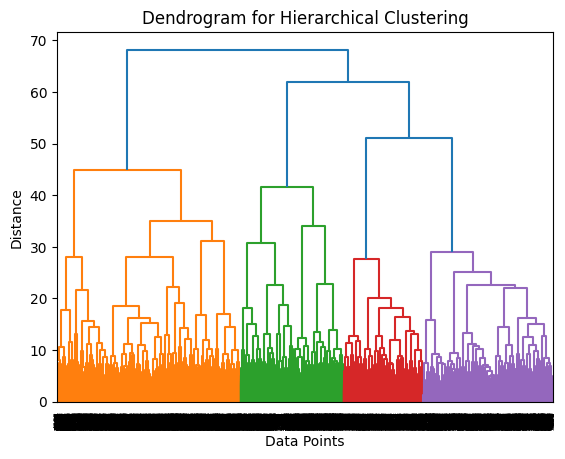

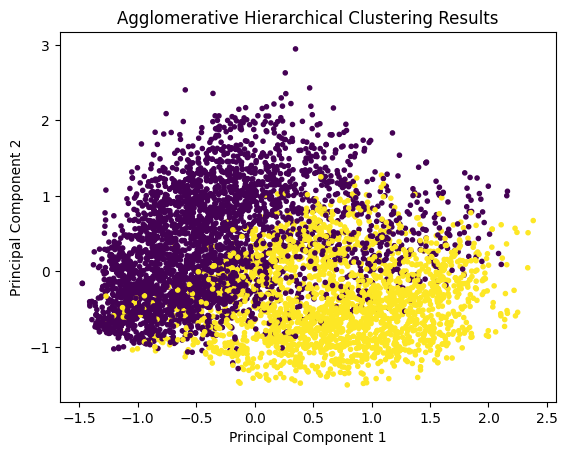

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

hc = AgglomerativeClustering()
clusters = hc.fit_predict(df_X)


link_m = linkage(df_X,method='ward')
dendrogram(link_m)

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

plt.scatter(dfPCA[:, 0], dfPCA[:, 1], c=clusters, cmap='viridis', marker='.')
plt.title('Agglomerative Hierarchical Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**GMM**

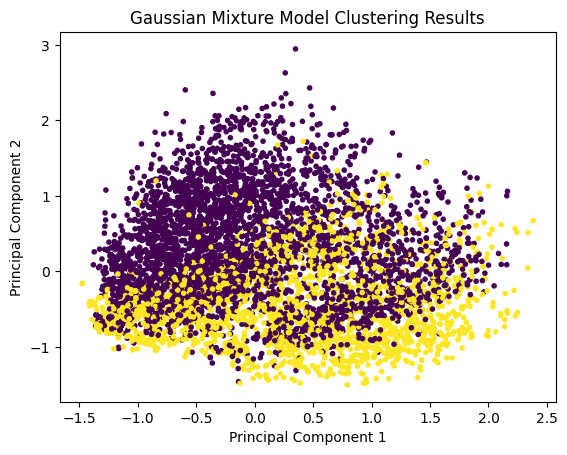

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2,random_state=42,init_params='kmeans',covariance_type="full")
clusters=gmm.fit_predict(df_X)

plt.scatter(dfPCA[:, 0], dfPCA[:, 1], c=clusters, cmap='viridis', marker='.')
plt.title('Gaussian Mixture Model Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Analysis and Conclusion**

Overall, based off the resulting graphs, DBSCAN was actually the worst out of the three. Hierarchical Clustering and GMM actually showcased different clusters whiel DBSCAN only showed one massive cluster. Furthermore, Hierarchical Clustering was easier to use as you do not necessarily need to instantiate any parameters. GMM is very sensitive to initalization and makes multiple assumptions about the data distributions.

Based off my findings and research, all 3 models have their strengths and weaknesses, but for this specific dataset, I believe the ranking is the following:


1.   Hierarchical Clustering
2.   GMM
3.   DBSCAN

